### Rendom Forest Classifier

Problem Statement: A cloth manufacturing company is interested to know about the segment or attributes causes high sale. 

#### Data Description
* Sales -- Unit sales (in thousands) at each location
* Competitor Price -- Price charged by competitor at each location
* Income -- Community income level (in thousands of dollars)
* Advertising -- Local advertising budget for company at each location (in thousands of dollars)
* Population -- Population size in region (in thousands)
* Price -- Price company charges for car seats at each site
* Shelf Location at stores -- A factor with levels Bad, Good and Medium indicating the quality of the shelving location for the car seats at each site
* Age -- Average age of the local population
* Education -- Education level at each location
* Urban -- A factor with levels No and Yes to indicate whether the store is in an urban or rural location
* US -- A factor with levels No and Yes to indicate whether the store is in the US or not

### Import Libraries

In [105]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.metrics import confusion_matrix,classification_report
from sklearn.ensemble import RandomForestClassifier

### Company Data

In [34]:
compny_data = pd.read_csv('Company_Data.csv')
compny_data.head()

,Sales,CompPrice,Income,Advertising,Population,Price,ShelveLoc,Age,Education,Urban,US
0,9.50,138,73,11,276,120,Bad,42,17,Yes,Yes
1,11.22,111,48,16,260,83,Good,65,10,Yes,Yes
2,10.06,113,35,10,269,80,Medium,59,12,Yes,Yes
3,7.40,117,100,4,466,97,Medium,55,14,Yes,Yes
4,4.15,141,64,3,340,128,Bad,38,13,Yes,No


In [35]:
compny_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 400 entries, 0 to 399
Data columns (total 11 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   Sales        400 non-null    float64
 1   CompPrice    400 non-null    int64  
 2   Income       400 non-null    int64  
 3   Advertising  400 non-null    int64  
 4   Population   400 non-null    int64  
 5   Price        400 non-null    int64  
 6   ShelveLoc    400 non-null    object 
 7   Age          400 non-null    int64  
 8   Education    400 non-null    int64  
 9   Urban        400 non-null    object 
 10  US           400 non-null    object 
dtypes: float64(1), int64(7), object(3)
memory usage: 34.5+ KB


### EDA

In [36]:
compny_data.describe()

,Sales,CompPrice,Income,Advertising,Population,Price,Age,Education
count,400.000000,400.000000,400.000000,400.000000,400.000000,400.000000,400.000000,400.000000
mean,7.496325,124.975000,68.657500,6.635000,264.840000,115.795000,53.322500,13.900000
std,2.824115,15.334512,27.986037,6.650364,147.376436,23.676664,16.200297,2.620528
min,0.000000,77.000000,21.000000,0.000000,10.000000,24.000000,25.000000,10.000000
25%,5.390000,115.000000,42.750000,0.000000,139.000000,100.000000,39.750000,12.000000
50%,7.490000,125.000000,69.000000,5.000000,272.000000,117.000000,54.500000,14.000000
75%,9.320000,135.000000,91.000000,12.000000,398.500000,131.000000,66.000000,16.000000
max,16.270000,175.000000,120.000000,29.000000,509.000000,191.000000,80.000000,18.000000


<AxesSubplot:>

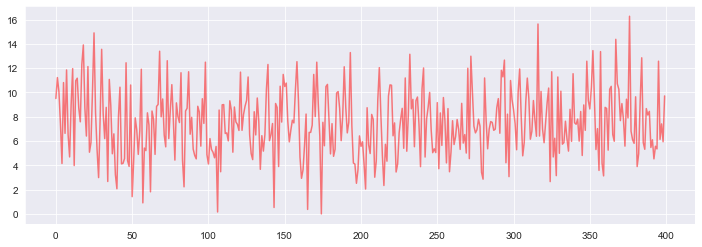

In [37]:
plt.figure(figsize=(12,4))
compny_data['Sales'].plot(color='red',alpha=0.5)

In [53]:
#convert sales into categorical
compny_data['Sales'] = compny_data['Sales'].apply(lambda x: "Low" if x<=7.5 else "High")

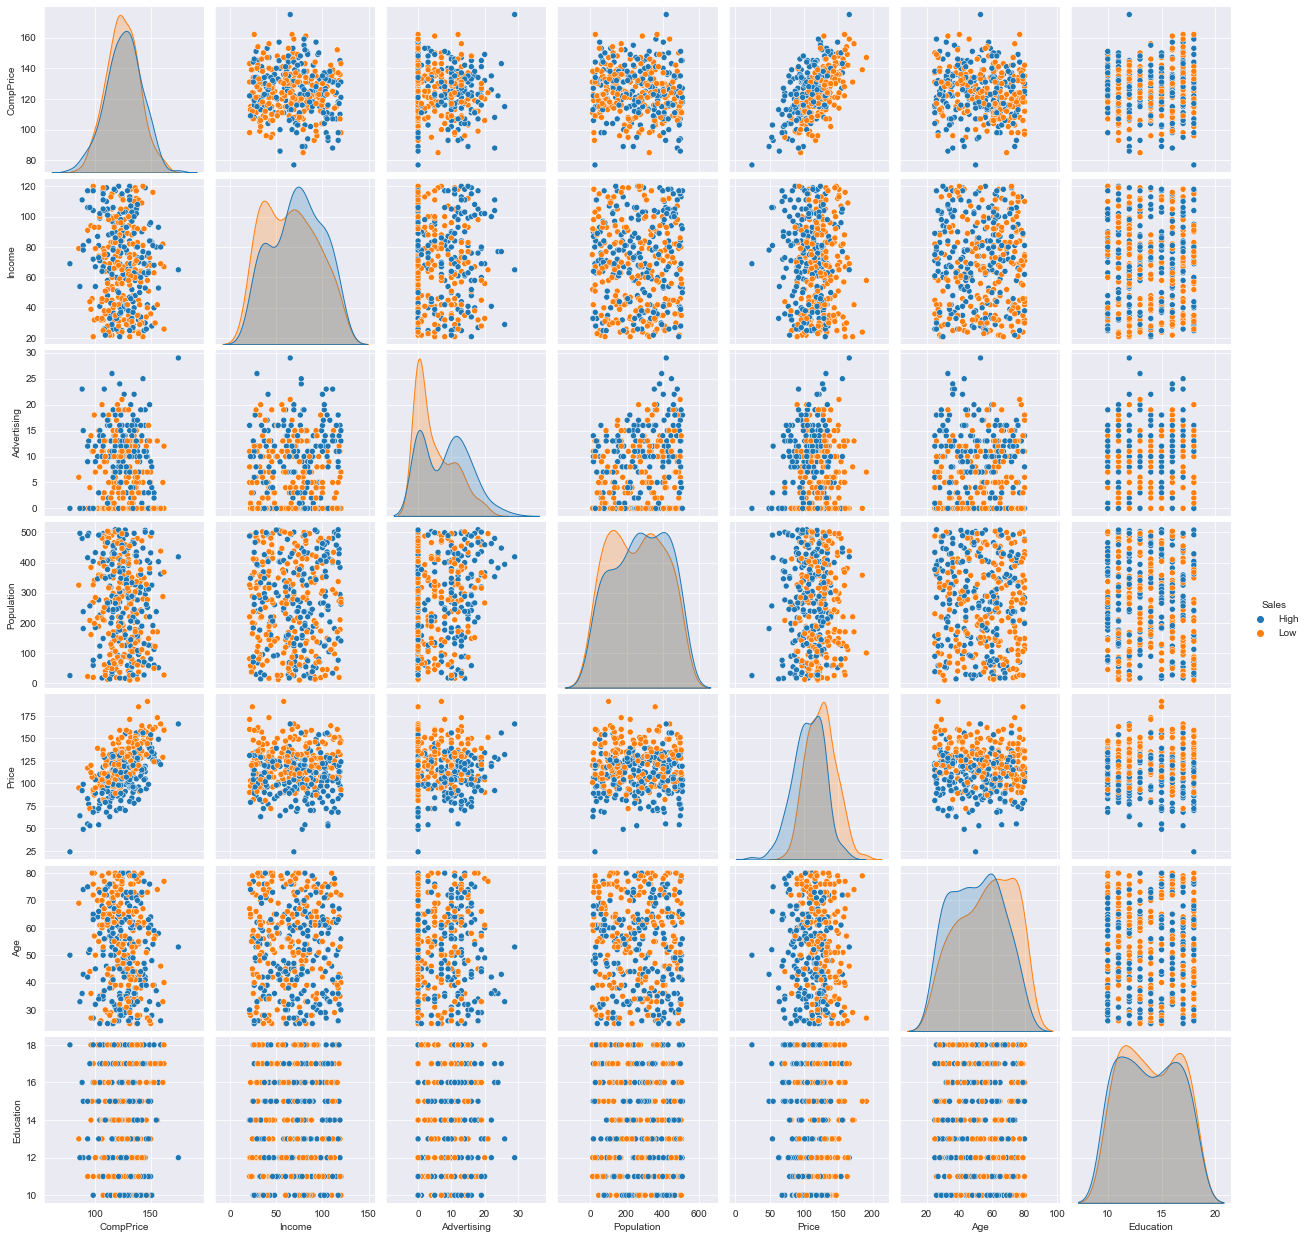

In [39]:
sns.set_style('darkgrid')
sns.pairplot(compny_data, hue='Sales')

<AxesSubplot:xlabel='Sales', ylabel='Age'>

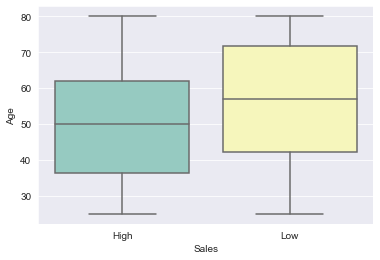

In [62]:
sns.boxplot(x='Sales', y='Age', data=compny_data, palette='Set3')

<AxesSubplot:xlabel='Sales', ylabel='Price'>

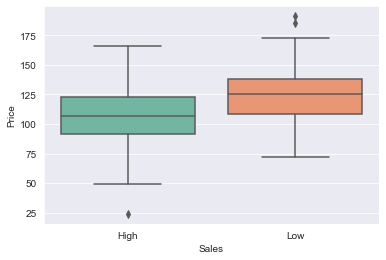

In [67]:
sns.boxplot(x='Sales', y='Price', data=compny_data, palette='Set2')

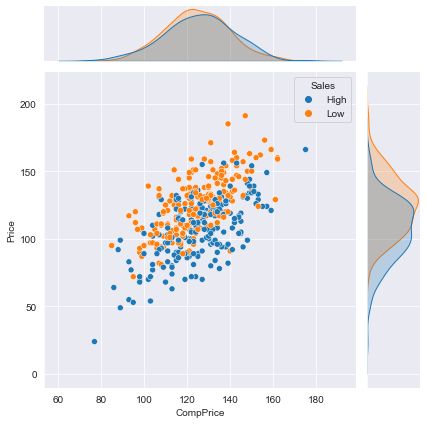

In [69]:
sns.jointplot(x='CompPrice', y='Price', hue='Sales', data=compny_data)

In [80]:
#Onehot encoding
dummy_data=pd.get_dummies(compny_data.drop(['Sales','CompPrice'],axis=1),drop_first=True)
dummy_data.head()

,Income,Advertising,Population,Price,Age,Education,ShelveLoc_Good,ShelveLoc_Medium,Urban_Yes,US_Yes
0,73,11,276,120,42,17,0,0,1,1
1,48,16,260,83,65,10,1,0,1,1
2,35,10,269,80,59,12,0,1,1,1
3,100,4,466,97,55,14,0,1,1,1
4,64,3,340,128,38,13,0,0,1,0


### Train Test Split

In [82]:
X = dummy_data.values
y = compny_data['Sales']

In [83]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.30)

### Model Building and Training

In [85]:
rfc = RandomForestClassifier(n_estimators=600)

In [86]:
rfc.fit(X_train,y_train)

RandomForestClassifier(n_estimators=600)

In [87]:
predictions = rfc.predict(X_test)

### Evaluation

In [90]:
print(classification_report(y_test,predictions))

              precision    recall  f1-score   support

        High       0.77      0.79      0.78        56
         Low       0.81      0.80      0.80        64

    accuracy                           0.79       120
   macro avg       0.79      0.79      0.79       120
weighted avg       0.79      0.79      0.79       120



In [91]:
print(confusion_matrix(y_test,predictions))

[[44 12]
 [13 51]]


#### Feature Importance

<AxesSubplot:>

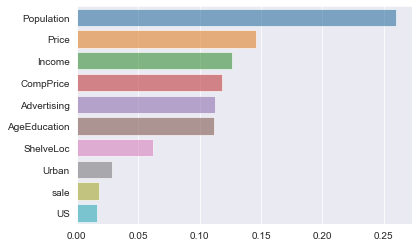

In [131]:
fn=['CompPrice','Income','Advertising','Population','Price','ShelveLoc','Age''Education','Urban','US','sale'  ]
feature_imp=pd.Series(rfc.feature_importances_,index=fn).sort_values(ascending=False)
sns.barplot(x=feature_imp,y=feature_imp.index,alpha=0.6)

### KFold Validation - Random Forest Classifier

In [98]:
kfold = KFold(n_splits=10,random_state=7,shuffle=True)
model = RandomForestClassifier(n_estimators=100,criterion='gini')
results = cross_val_score(model,X,y,cv=kfold)

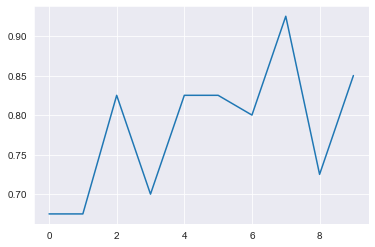

In [103]:
plt.plot(results)

### Hyperparameter Tunning

In [112]:
estimator = RandomForestClassifier()
params = { 'bootstrap': [True],
    'max_depth': [80, 90, 100, 110],
    'max_features': [2, 3],
    'min_samples_leaf': [3, 4, 5],
    'min_samples_split': [8, 10, 12],
    'n_estimators': [100, 200, 300, 1000]}

In [113]:
clf = GridSearchCV(estimator,params,cv=5,n_jobs=-1,scoring='f1_macro')
clf.fit(X_train,y_train)

GridSearchCV(cv=5, estimator=RandomForestClassifier(), n_jobs=-1,
             param_grid={'bootstrap': [True], 'max_depth': [80, 90, 100, 110],
                         'max_features': [2, 3], 'min_samples_leaf': [3, 4, 5],
                         'min_samples_split': [8, 10, 12],
                         'n_estimators': [100, 200, 300, 1000]},
             scoring='f1_macro')

In [116]:
clf.best_params_

{'bootstrap': True,
 'max_depth': 80,
 'max_features': 2,
 'min_samples_leaf': 5,
 'min_samples_split': 8,
 'n_estimators': 100}

In [117]:
clf.best_score_

0.7997993066958584